In [85]:
# !pip3 install geopandas geoplot

# Data via https://hub.arcgis.com/datasets/f5abc06dce4f4a03bde94d6f937996d6?selectedAttribute=POP_BLACK

In [10]:
import geopandas
import geoplot

import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

In [103]:
wards = geopandas.read_file("https://maps2.dcgis.dc.gov/dcgis/rest/services/DCGIS_DATA/Administrative_Other_Boundaries_WebMercator/MapServer/31/query?outFields=*&where=1%3D1&f=geojson")
wards = wards.to_crs(epsg=3857)
covid_by_ward = geopandas.read_file("https://opendata.arcgis.com/datasets/94b5ab3b8b334d31aa395aea9bef2c10_27.geojson")
wards = wards.join(covid_by_ward.groupby("WARD").max(), on="NAME", lsuffix="_")

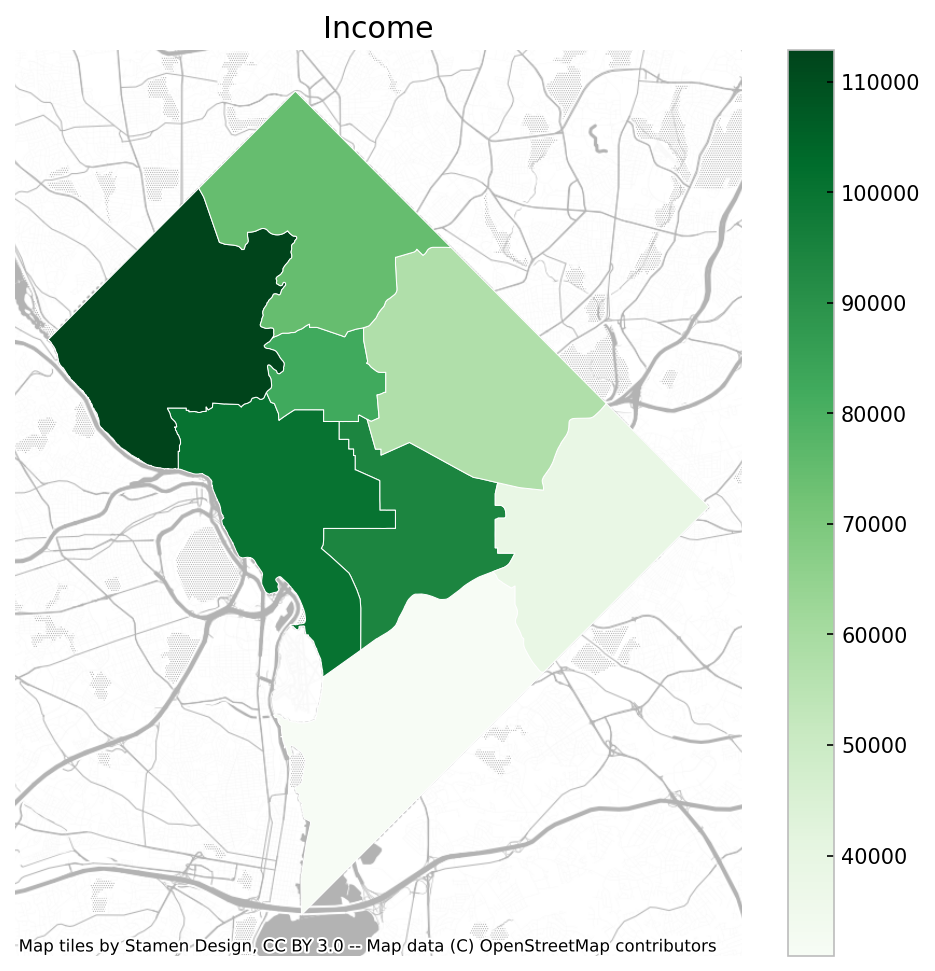

In [131]:
with plt.style.context("bmh"):
    plt.figure(figsize=(8, 8), dpi=150)
    ax = wards.plot(
        column=wards.MEDIAN_HH_INCOME.astype(int), 
        cmap="Greens", 
        legend=True,
        edgecolor='w', 
        legend_kwds={"fmt": "{:.0f}"},
        ax=plt.gca()
    )
    ax.axes.set_axis_off()
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerBackground, alpha=0.3)
    plt.title("Income")

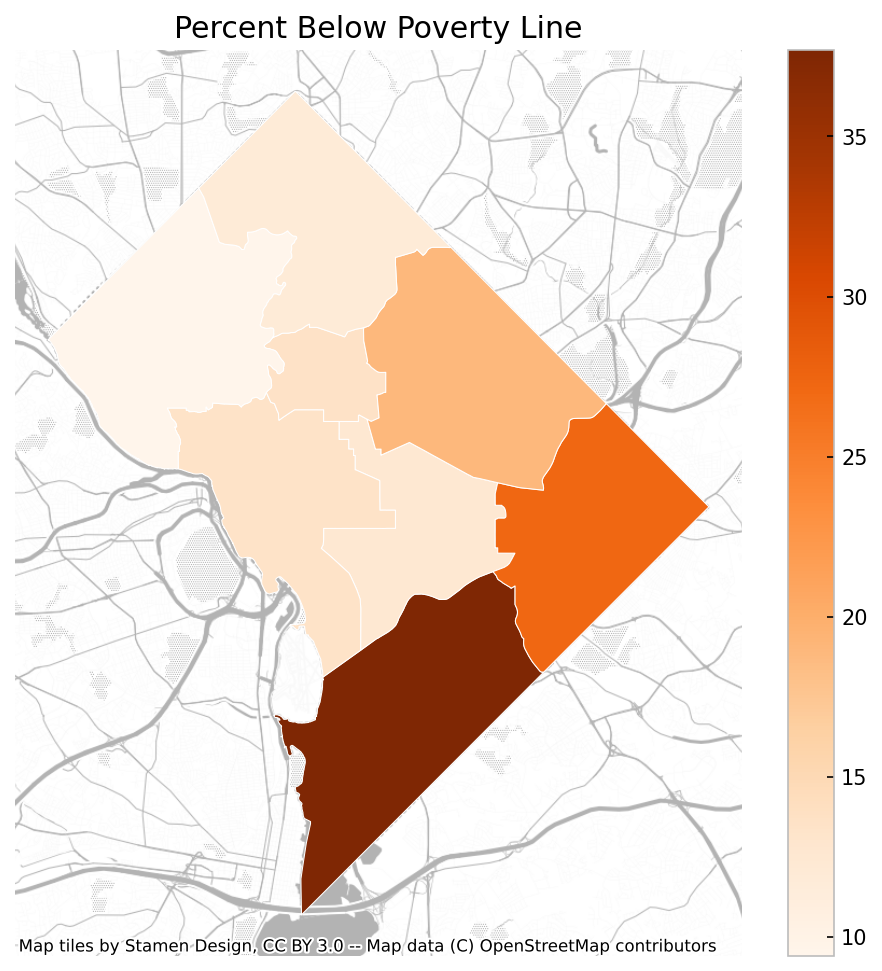

In [132]:
with plt.style.context("bmh"):
    plt.figure(figsize=(8, 8), dpi=150)
    ax = wards.plot(
        column=wards.PCT_BELOW_POV.astype(float), 
        cmap="Oranges", 
        legend=True,
        edgecolor='w',
        ax=plt.gca()
    )
    ax.axes.set_axis_off()
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerBackground, alpha=0.3)
    plt.title("Percent Below Poverty Line")

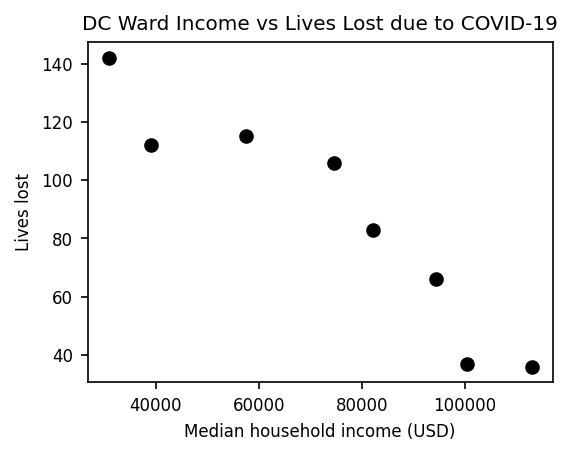

In [144]:
with plt.style.context("ieee"):
    plt.figure(figsize=(4, 3), dpi=150, facecolor='white')
    plt.title("DC Ward Income vs Lives Lost due to COVID-19")
    plt.scatter(wards.MEDIAN_HH_INCOME.astype(int), wards.LIVES_LOST)
    plt.xlabel("Median household income (USD)")
    plt.ylabel("Lives lost")